<a href="https://colab.research.google.com/github/rtajeong/M3/blob/main/lab14_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering (군집화)
- data from 전력거래소
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### data read

In [ ]:
!curl -L "https://goo.gl/Cx8Rzw" -o power_data.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   184    0   184    0     0    320      0 --:--:-- --:--:-- --:--:--   320
100   318  100   318    0     0    382      0 --:--:-- --:--:-- --:--:--   382
100  1076    0  1076    0     0    954      0 --:--:--  0:00:01 --:--:-- 32606
100 17920  100 17920    0     0  13293      0  0:00:01  0:00:01 --:--:-- 13293


In [ ]:
df = pd.read_excel('power_data.xls')
df.head()

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,1917458,731348,6881775,1336390,1728379,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


In [ ]:
print(df.columns)
print(df.index)

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')
RangeIndex(start=0, stop=19, step=1)


In [ ]:
df.shape

(19, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      19 non-null     object
 1   주거용     19 non-null     int64 
 2   공공용     19 non-null     int64 
 3   서비스업    19 non-null     int64 
 4   업무용합계   19 non-null     int64 
 5   농림어업    19 non-null     int64 
 6   광업      19 non-null     int64 
 7   제조업     19 non-null     int64 
 8   식료품제조   19 non-null     int64 
 9   섬유,의류   19 non-null     int64 
 10  목재,나무   19 non-null     int64 
 11  펄프,종이   19 non-null     int64 
 12  출판,인쇄   19 non-null     int64 
 13  석유,화확   19 non-null     int64 
 14  의료,광학   19 non-null     int64 
 15  요업      19 non-null     int64 
 16  1차금속    19 non-null     int64 
 17  조립금속    19 non-null     int64 
 18  기타기계    19 non-null     int64 
 19  사무기기    19 non-null     int64 
 20  전기기기    19 non-null     int64 
 21  영상,음향   19 non-null     int64 
 22  자동차     19 non-null     int6

In [ ]:
df.head()

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,1917458,731348,6881775,1336390,1728379,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


In [ ]:
df.describe()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
count,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,1.900000e+01,1.900000e+01
mean,6.899673e+06,2.410981e+06,1.451057e+07,1.692155e+07,1.650270e+06,1.628526e+05,2.694144e+07,1.158857e+06,1.184641e+06,2.016269e+05,8.814958e+05,1.466768e+05,6.355944e+06,6.199787e+05,1.133091e+06,4.716823e+06,1.000385e+06,1.107597e+06,51397.000000,6.087239e+05,5.018716e+06,1.878618e+06,4.595993e+05,3.581517e+05,59117.789474,2.875456e+07,5.257579e+07
std,1.457381e+07,4.957221e+06,3.031208e+07,3.526148e+07,3.464035e+06,3.102484e+05,5.669154e+07,2.399623e+06,2.604338e+06,4.514169e+05,1.881775e+06,3.464340e+05,1.382194e+07,1.390488e+06,2.123939e+06,1.011038e+07,2.145323e+06,2.437518e+06,127516.047494,1.300814e+06,1.190370e+07,3.981244e+06,1.058183e+06,8.481672e+05,126709.246048,6.037040e+07,1.092609e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1.906912e+06,6.959615e+05,3.802654e+06,4.524926e+06,7.203850e+04,9.938500e+03,2.759556e+06,1.959545e+05,7.325600e+04,5.590500e+03,4.255400e+04,7.220500e+03,3.390540e+05,3.830050e+04,6.080900e+04,6.611850e+04,6.701200e+04,7.220050e+04,3672.000000,6.083550e+04,4.510550e+04,9.622850e+04,1.154750e+04,1.313200e+04,2739.000000,2.814293e+06,1.240509e+07
50%,2.326183e+06,1.089613e+06,5.690659e+06,6.654683e+06,6.071390e+05,7.152900e+04,1.236782e+07,5.329430e+05,3.338460e+05,2.799800e+04,3.617720e+05,2.394000e+04,1.865583e+06,8.439700e+04,3.058480e+05,2.020196e+06,3.934690e+05,1.988470e+05,7240.000000,1.785020e+05,4.200050e+05,6.128980e+05,6.812700e+04,4.181400e+04,19725.000000,1.258230e+07,2.451531e+07
75%,4.058920e+06,1.413990e+06,8.034786e+06,9.476781e+06,1.837764e+06,1.822120e+05,2.366853e+07,1.034889e+06,8.374750e+05,1.033945e+05,8.137225e+05,4.883650e+04,5.666948e+06,4.025660e+05,1.092337e+06,4.240276e+06,8.118030e+05,8.433595e+05,14393.500000,5.898460e+05,2.614198e+06,2.256474e+06,1.775380e+05,1.976150e+05,46850.000000,2.530336e+07,4.005174e+07
max,6.457642e+07,2.220411e+07,1.347485e+08,1.569527e+08,1.537399e+07,1.347957e+06,2.529425e+08,1.073583e+07,1.124758e+07,1.905882e+06,8.362019e+06,1.389566e+06,6.029381e+07,5.847599e+06,8.916474e+06,4.429036e+07,9.483924e+06,1.050464e+07,487262.000000,5.763846e+06,4.765581e+07,1.779015e+07,4.311878e+06,3.396006e+06,559909.000000,2.696645e+08,4.911936e+08


In [ ]:
df = df.set_index('구분')
df = df.drop(['합계', '개성'], errors='ignore')
df.shape

(17, 27)

In [ ]:
df.head()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,1917458,731348,6881775,1336390,1728379,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,41827,22038,391151,27221,20728,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649


### Fonts for Korean Letters (한글폰트) 

In [ ]:
# Colab 에서 한글 폰트 설정 - 설중 후에 꼭 다시 runtime restart 해 주어야 함
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

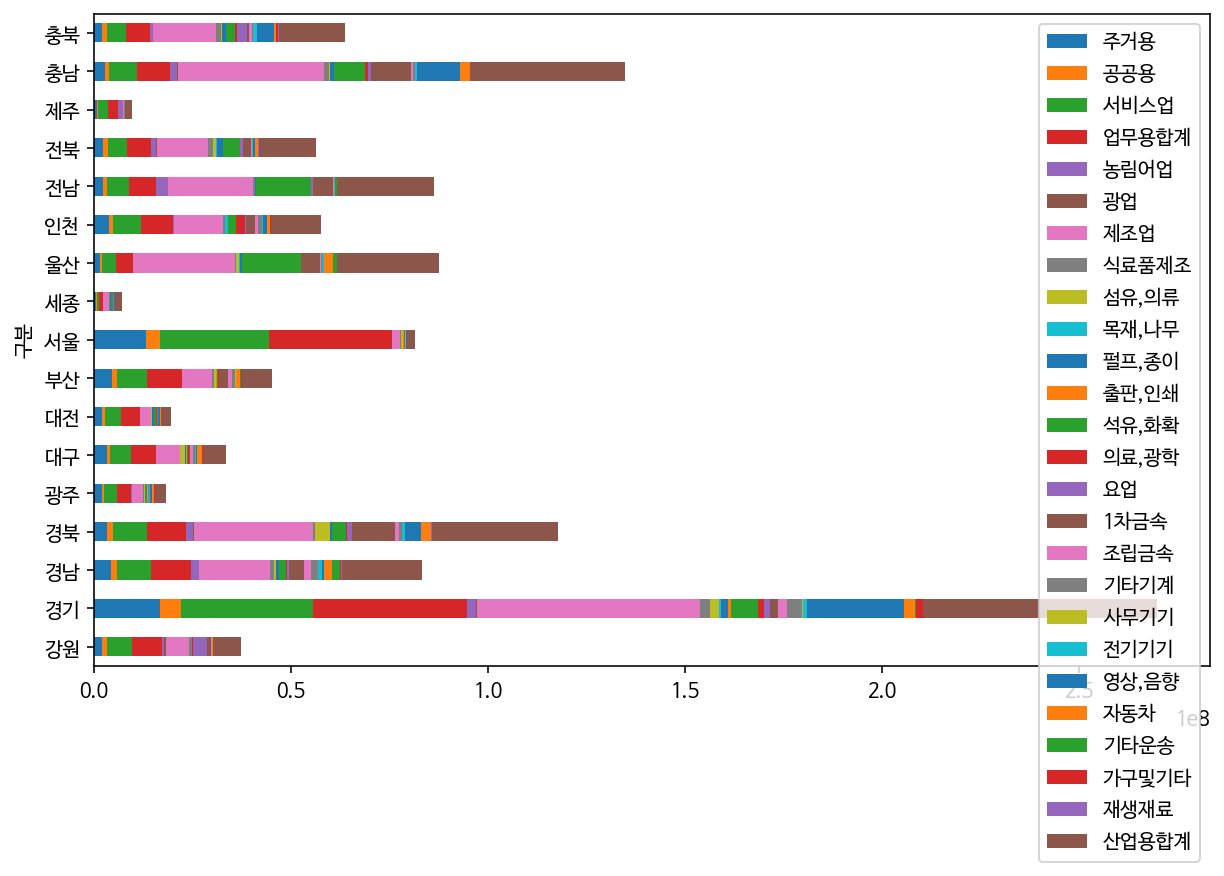

In [ ]:
df = df.drop("합계",axis=1)
df.plot(kind='barh', figsize=(10,6), stacked=True)

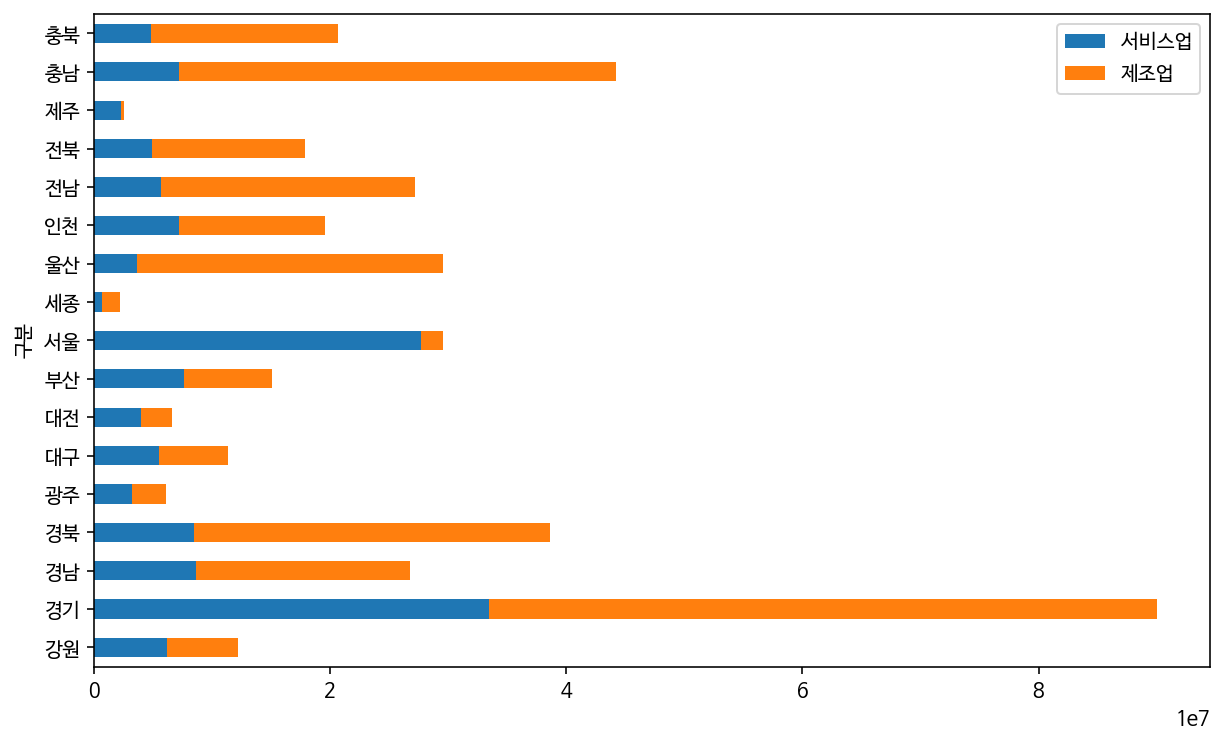

In [ ]:
see_c = ['서비스업','제조업']
df[see_c].plot(kind='barh', figsize=(10,6), stacked=True)

In [ ]:
df2 = df[see_c]
df2.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


### scatter plot

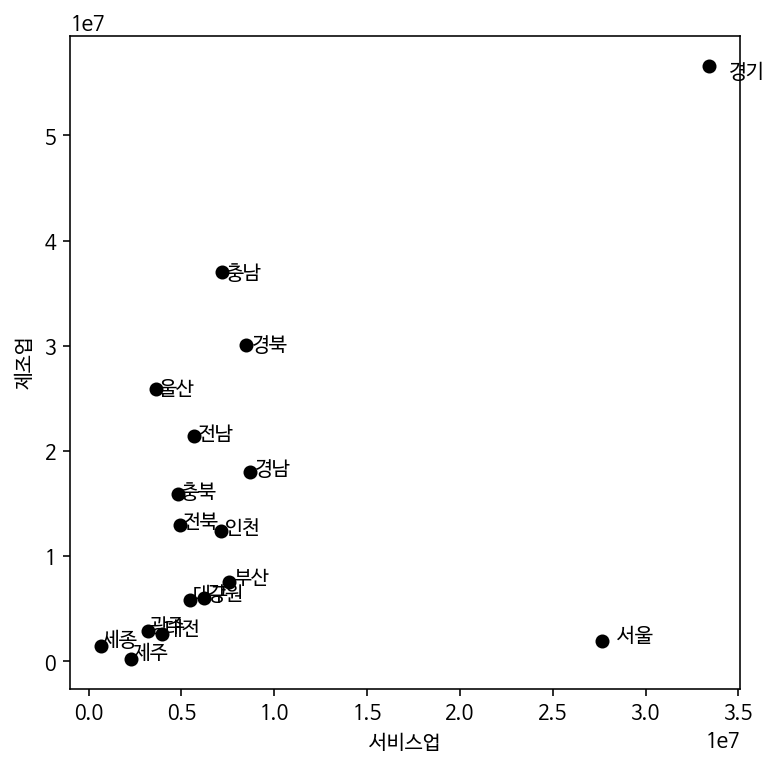

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df2['서비스업'], df2['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(df2.shape[0]):
    plt.text(df2['서비스업'][n]*1.03, df2['제조업'][n]*0.98, df2.index[n])

In [ ]:
df2 = df2.drop(['경기', '서울'])
df2.shape

(15, 2)

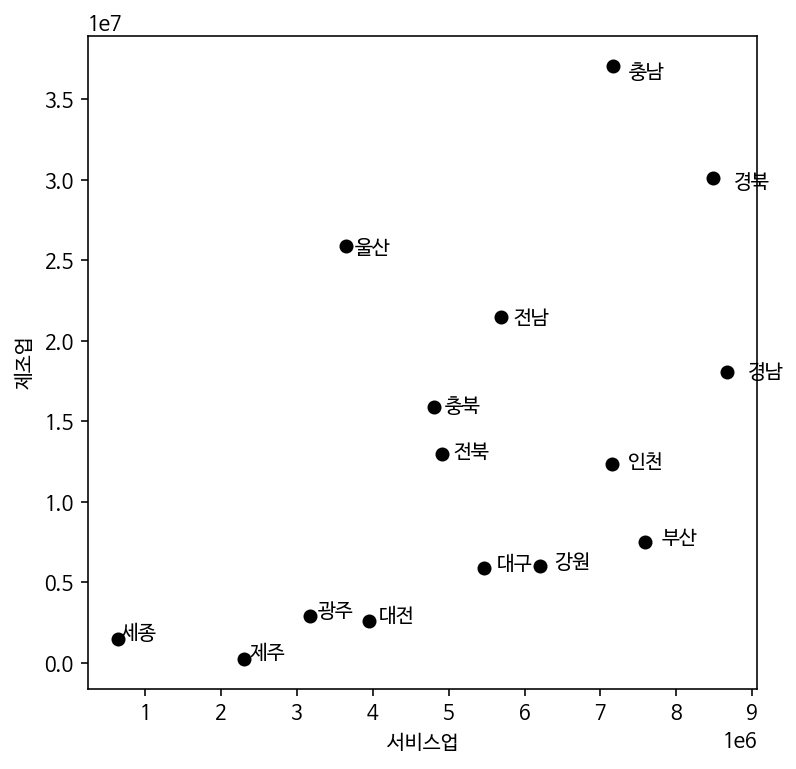

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df2['서비스업'], df2['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(df2.shape[0]):
    plt.text(df2['서비스업'][n]*1.03, df2['제조업'][n]*0.98, df2.index[n])

### Agglomerative clustering (Hierarchical) and Dendrogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 5))
link_dist = linkage(df2, metric='euclidean', method='centroid')
link_dist

array([[0.00000000e+00, 4.00000000e+00, 7.46490444e+05, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 8.37460840e+05, 2.00000000e+00],
       [7.00000000e+00, 1.20000000e+01, 2.08750703e+06, 2.00000000e+00],
       [9.00000000e+00, 1.10000000e+01, 2.32242339e+06, 2.00000000e+00],
       [6.00000000e+00, 1.50000000e+01, 2.35416537e+06, 3.00000000e+00],
       [1.60000000e+01, 1.70000000e+01, 2.81483295e+06, 4.00000000e+00],
       [1.40000000e+01, 1.80000000e+01, 3.44294208e+06, 3.00000000e+00],
       [1.00000000e+00, 1.00000000e+01, 4.51929196e+06, 2.00000000e+00],
       [1.90000000e+01, 2.00000000e+01, 6.06223563e+06, 7.00000000e+00],
       [2.10000000e+01, 2.20000000e+01, 6.21282975e+06, 5.00000000e+00],
       [2.00000000e+00, 8.00000000e+00, 6.42807846e+06, 2.00000000e+00],
       [1.30000000e+01, 2.50000000e+01, 9.12465562e+06, 3.00000000e+00],
       [2.30000000e+01, 2.40000000e+01, 1.25088770e+07, 1.20000000e+01],
       [2.60000000e+01, 2.70000000e+01, 2.21152298e

<Figure size 720x360 with 0 Axes>

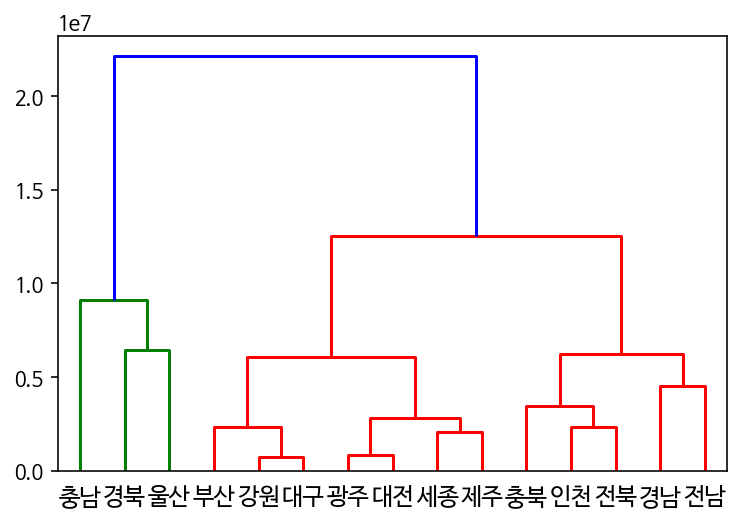

In [ ]:

# method = ward, median, centroid, average, weightd, complete, single
dendrogram(link_dist, labels=list(df2.index))
plt.show()

### KMeans
Animation to explain algo - http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3).fit(df2)
print(km.n_clusters)

3


In [ ]:
km.labels_, km.cluster_centers_

(array([1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0], dtype=int32),
 array([[ 6245553.6       , 16144968.6       ],
        [ 4191629.42857143,  3805868.14285714],
        [ 6433742.33333333, 31018896.        ]]))

In [ ]:
km_labels_two = km.labels_       # for compare later on

In [ ]:
df2['클러스터'] = km.labels_
df2

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,1
경남,8667737,18053778,0
경북,8487402,30115601,2
광주,3174973,2910768,1
대구,5470438,5862633,1
대전,3955921,2608343,1
부산,7582169,7512588,1
세종,645424,1502922,1
울산,3649386,25883132,2


In [ ]:
df2.drop('클러스터', axis = 1, inplace=True) ; df2.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [ ]:
centers = km.cluster_centers_ ; centers

array([[ 6245553.6       , 16144968.6       ],
       [ 4191629.42857143,  3805868.14285714],
       [ 6433742.33333333, 31018896.        ]])

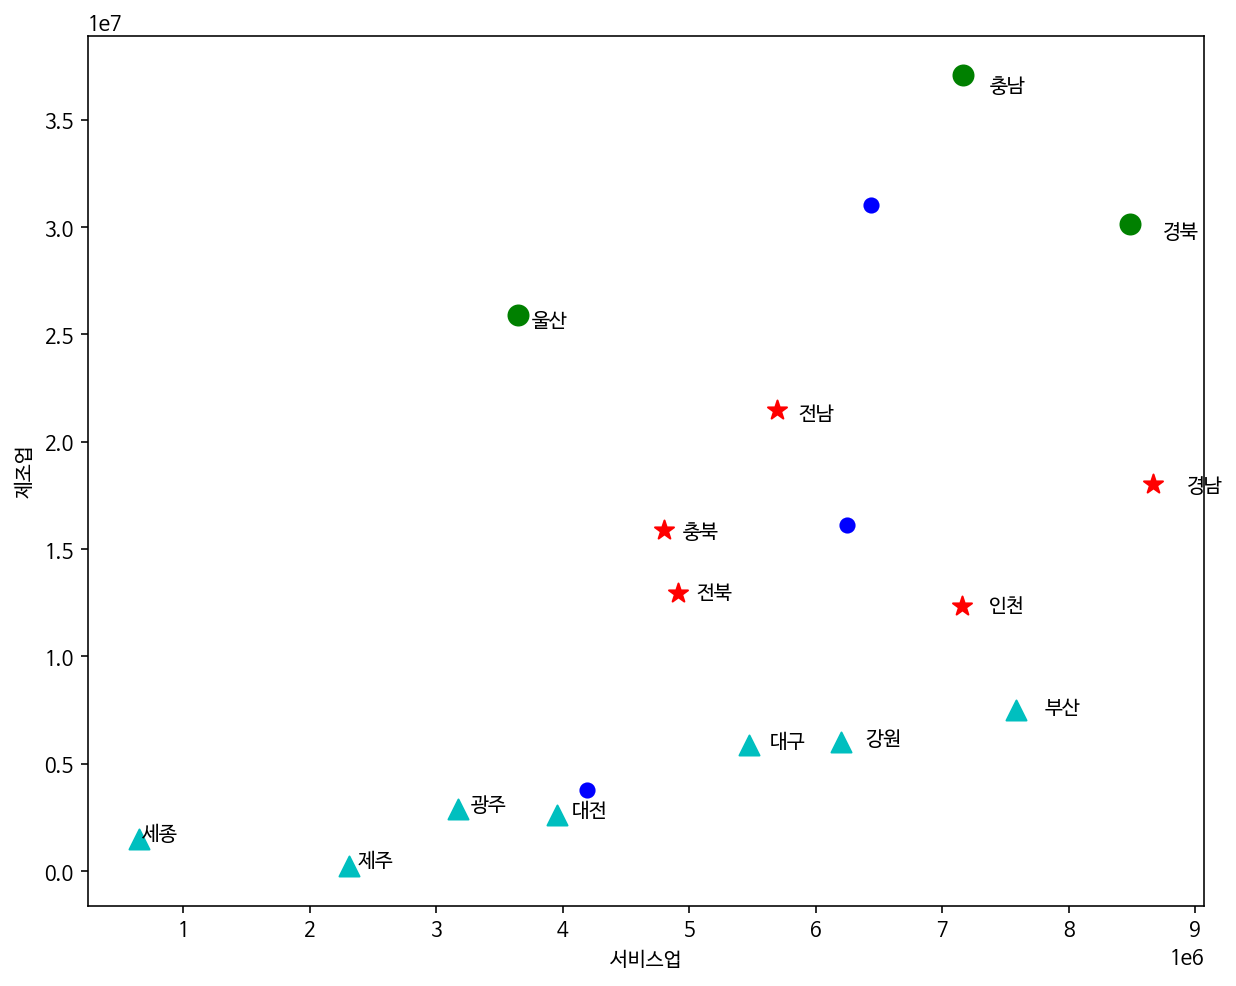

In [ ]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(df2.shape[0]):
    label = km.labels_[n]
    plt.scatter(df2['서비스업'][n], df2['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(df2['서비스업'][n]*1.03, df2['제조업'][n]*0.98, df2.index[n])
    
for i in range(km.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'b', s= 50)

### Scaling (don't forget !)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[['서비스업', '제조업']] = scaler.fit_transform(df2[['서비스업', '제조업']])
df2.head(3)

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632


### Clustering after Scaling

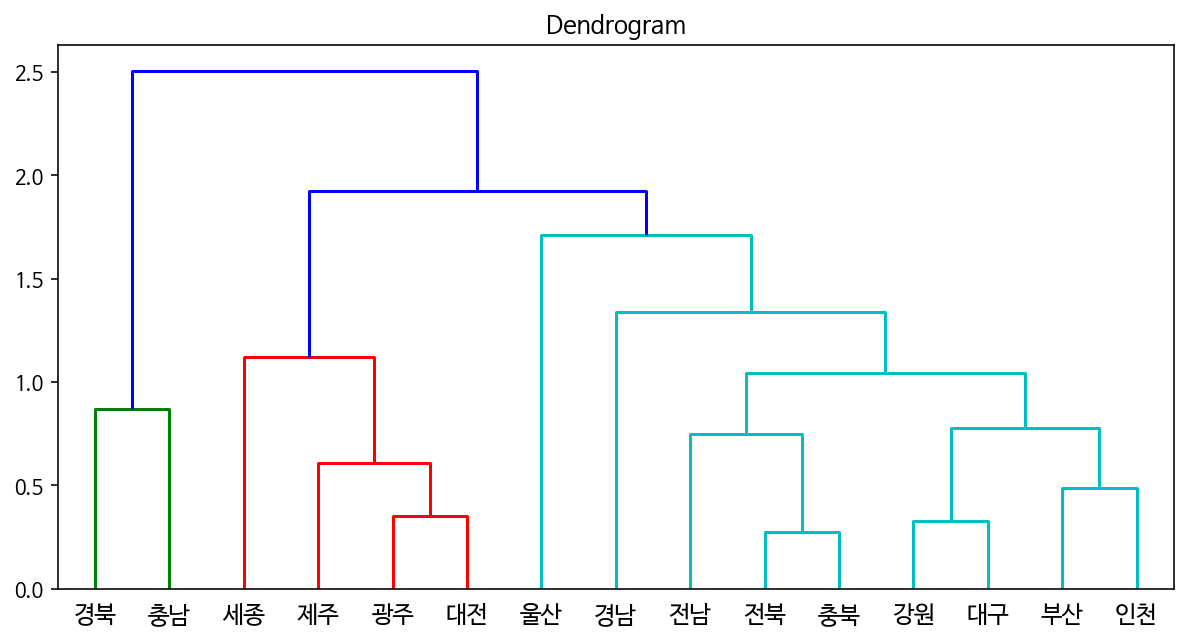

In [ ]:
Z = linkage(df2, metric='euclidean', method='centroid')
plt.figure(figsize=(10, 5))
plt.title('Dendrogram')
dendrogram(Z, labels=df2.index)
plt.show()

In [ ]:
km = KMeans(n_clusters= 3).fit(df2)

In [ ]:
centers = km.cluster_centers_
km_labels_two_scaled = km.labels_        # for compare later on

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 432x288 with 0 Axes>

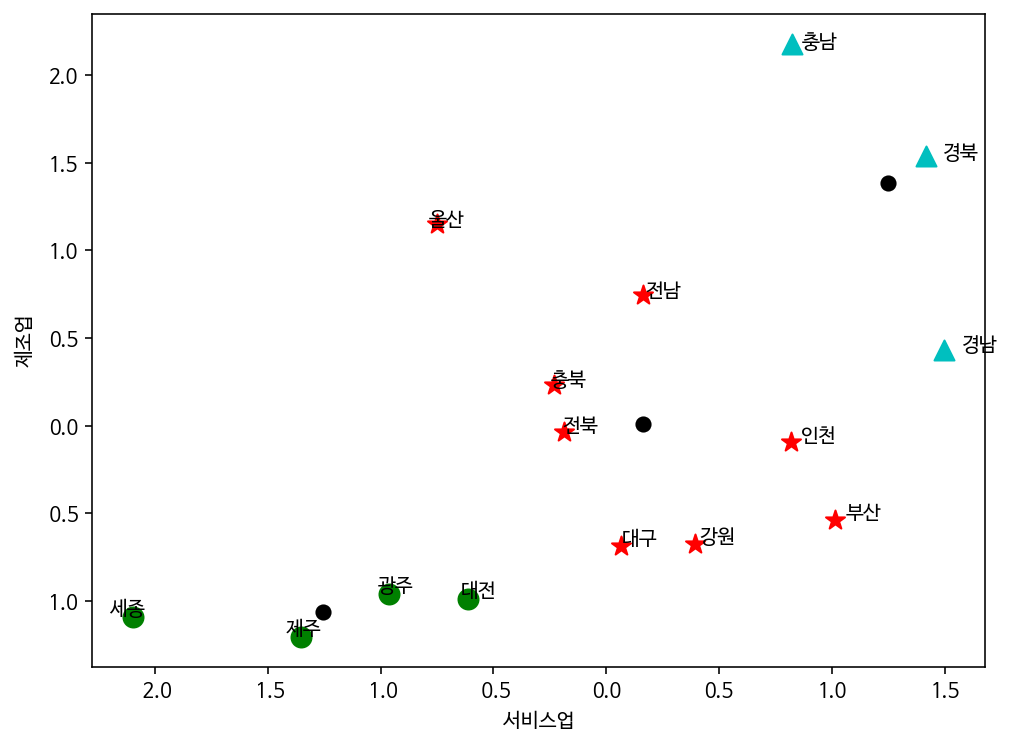

In [ ]:
plt.clf()
plt.figure(figsize=(8, 6))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(df2.shape[0]):
    label = km.labels_[n]
    plt.scatter(df2['서비스업'][n], df2['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(df2['서비스업'][n]*1.05, df2['제조업'][n]*0.99, df2.index[n])
    
for i in range(km.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'k', s= 50)

### Let's use all features for clustering (instead of two)

In [ ]:
df.head().T

구분,강원,경기,경남,경북,광주
주거용,1940933,16587710,4260988,3302463,1954876
공공용,1400421,5533662,1427560,1578115,565527
서비스업,6203749,33434551,8667737,8487402,3174973
업무용합계,7604170,38968213,10095297,10065517,3740500
농림어업,607139,2371347,2141813,1747462,74608
광업,398287,317263,95989,224568,2898
제조업,6002286,56603327,18053778,30115601,2910768
식료품제조,546621,2544420,932743,566071,161072
"섬유,의류",13027,2109963,346974,3780171,295922
"목재,나무",19147,529274,60160,72680,6782


In [ ]:
df.drop(['업무용합계', '산업용합계', '합계'], axis=1, inplace=True, errors='ignore')
df.drop(['경기','서울'], inplace=True,errors='ignore')

In [ ]:
df.head()

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418
경남,4260988,1427560,8667737,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662
경북,3302463,1578115,8487402,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104
광주,1954876,565527,3174973,74608,2898,2910768,161072,295922,6782,41827,22038,391151,27221,20728,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049
대구,3151904,826396,5470438,69142,5858,5862633,212626,1057342,16215,445646,46804,418485,85871,68137,317580,661307,516493,58446,180189,252662,1381273,68127,41814,33616


In [ ]:
index_ = df.index
column_ = df.columns

In [ ]:
index_

Index(['강원', '경남', '경북', '광주', '대구', '대전', '부산', '세종', '울산', '인천', '전남', '전북',
       '제주', '충남', '충북'],
      dtype='object', name='구분')

In [ ]:
column_

Index(['주거용', '공공용', '서비스업', '농림어업', '광업', '제조업', '식료품제조', '섬유,의류', '목재,나무',
       '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속', '조립금속', '기타기계',
       '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료'],
      dtype='object')

In [ ]:
type(column_)

pandas.core.indexes.base.Index

In [ ]:
list(column_)

['주거용',
 '공공용',
 '서비스업',
 '농림어업',
 '광업',
 '제조업',
 '식료품제조',
 '섬유,의류',
 '목재,나무',
 '펄프,종이',
 '출판,인쇄',
 '석유,화확',
 '의료,광학',
 '요업',
 '1차금속',
 '조립금속',
 '기타기계',
 '사무기기',
 '전기기기',
 '영상,음향',
 '자동차',
 '기타운송',
 '가구및기타',
 '재생재료']

In [ ]:
list(column_).index('제조업'), list(column_).index('서비스업')

(5, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)    # returns an array (not dataframe)

In [ ]:
print(type(df), type(df_scaled))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


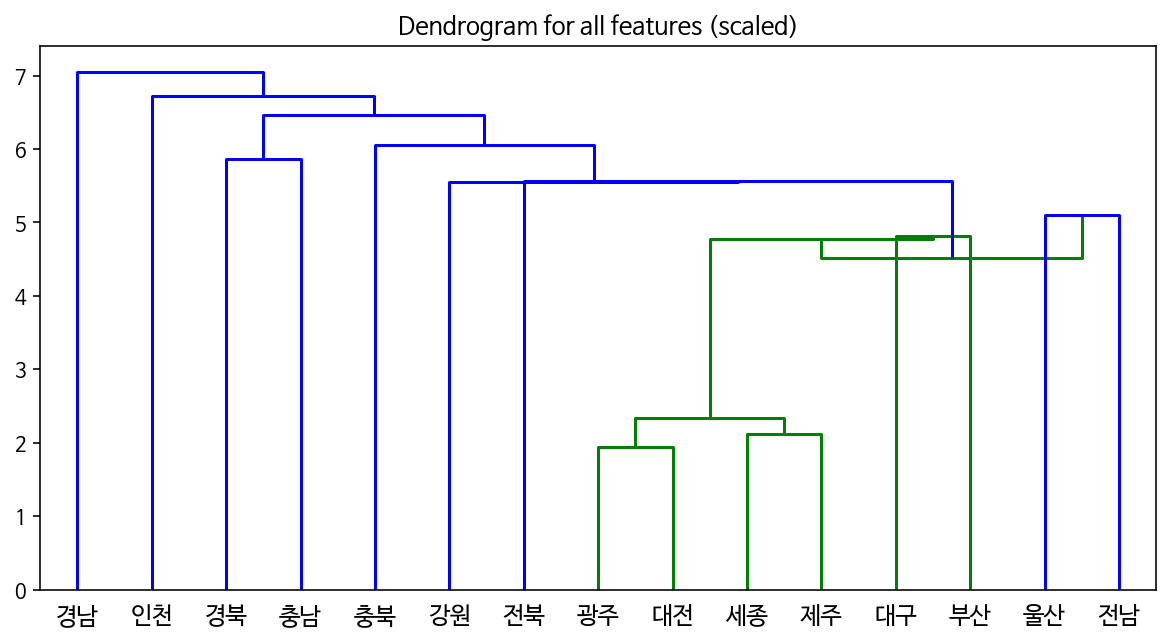

In [ ]:
Z = linkage(df_scaled, metric='euclidean', method='centroid')
plt.figure(figsize=(10, 5))
plt.title('Dendrogram for all features (scaled)')
dendrogram(Z, labels=index_)   # version 에 따라 list(index_) 로 해야 할 수도 있음
plt.show()

In [ ]:
km = KMeans(n_clusters=3).fit(df_scaled)
print(km.cluster_centers_)
print(km.labels_)

[[-0.71953465 -0.95925028 -0.9921315  -0.61815279 -0.7821811  -0.98661852
  -0.96658271 -0.3094315  -0.53187709 -0.39280873 -0.33585775 -0.67984483
  -0.45280229 -0.62458466 -0.82373903 -0.64306401 -0.57159719  0.37005016
  -0.62484722 -0.42855837 -0.61607493 -0.50909397 -0.51709326 -0.61633304]
 [ 0.04292681  0.21785836  0.12664437  0.16377094  0.23008231  0.12884299
   0.1944372  -0.11092067 -0.0743858  -0.02176492 -0.61063517  0.68282797
  -0.43319914  0.30527735  0.05323245 -0.35465683 -0.36670571 -0.51052876
  -0.46201867 -0.49894055 -0.11307296  0.17438819 -0.51082322  0.04672959]
 [ 0.67660784  0.74139192  0.86548713  0.45438185  0.5520988   0.85777554
   0.77214551  0.42035217  0.60626288  0.41457365  0.94649292 -0.00298315
   0.88600143  0.31930731  0.77050659  0.99772085  0.9383029   0.1404786
   1.08686589  0.92749893  0.72914789  0.33470578  1.02791649  0.56960345]]
[1 2 2 0 0 0 1 0 1 2 1 1 0 2 2]


In [ ]:
print("all features, scaled: ", km.labels_)
print("two features:         ", km_labels_two)
print("two features, scaled: ", km_labels_two_scaled)

all features, scaled:  [1 2 2 0 0 0 1 0 1 2 1 1 0 2 2]
two features:          [1 0 2 1 1 1 1 1 2 0 0 0 1 2 0]
two features, scaled:  [0 1 1 2 0 2 0 2 0 0 0 0 2 1 0]


## DBSCAN(eps=, min_samples=,metric=) 
- eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
- min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.
- metric: The metric to use when calculating distance between instances in a feature array. 

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=300, noise=0.1, random_state=11)   # X :samples, y: label

X[:5],y[:5]

(array([[ 0.07466556, -0.13809597],
        [-0.96718677,  0.77131154],
        [-0.211739  ,  1.01774394],
        [ 1.22822953, -0.34209166],
        [ 0.99307628,  0.13267972]]), array([1, 0, 0, 1, 0]))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


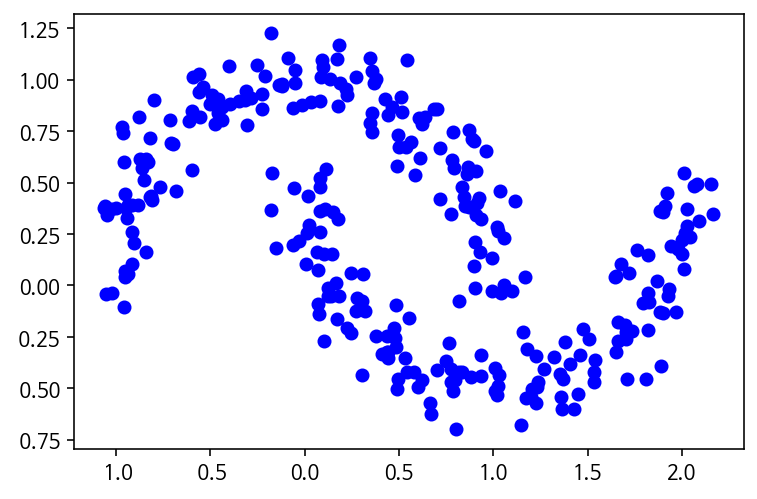

In [ ]:
plt.scatter(X[:,0], X[:,1], c='b')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X)   # returns a predicted array

predict

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1], d

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


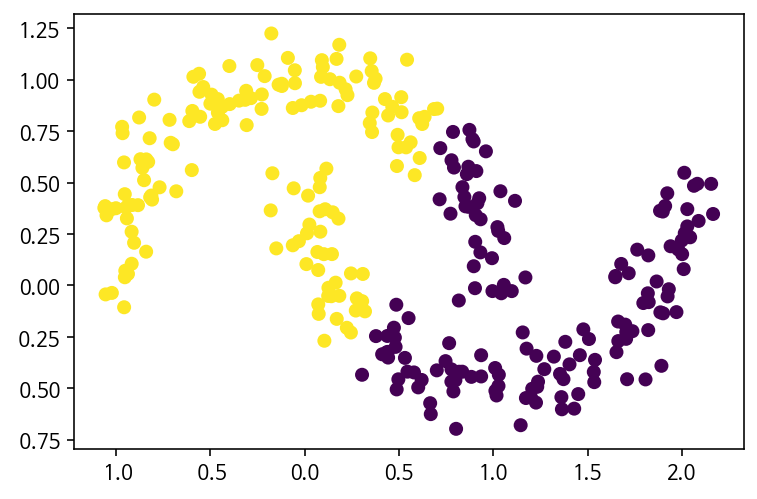

In [ ]:
plt.scatter(X[:,0], X[:,1],c=predict)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


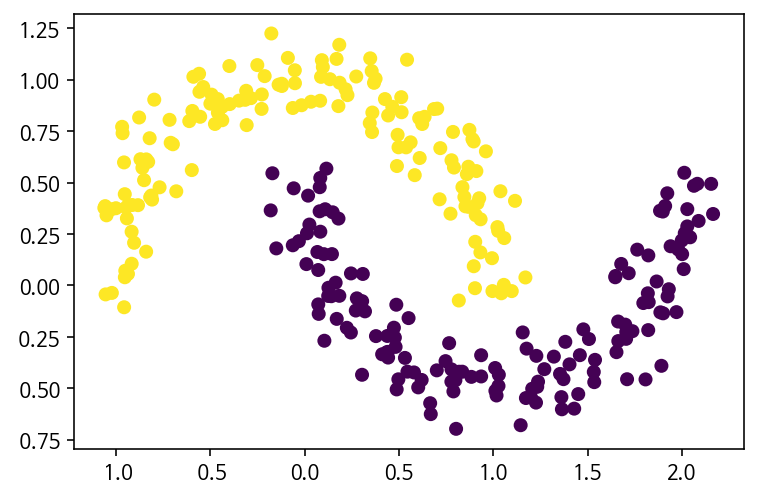

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

In [ ]:
predict

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


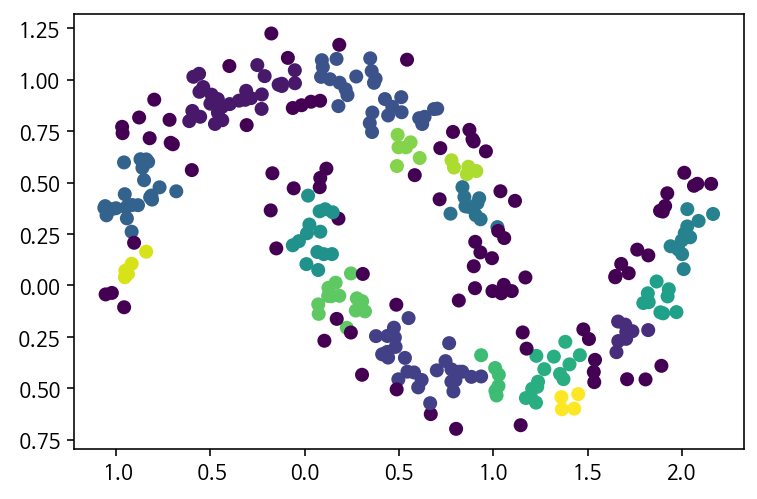

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


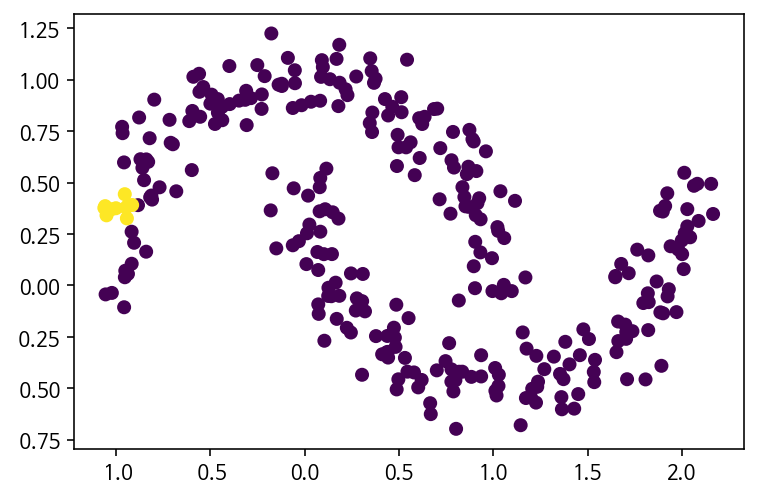

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
print(predict)
plt.scatter(X[:,0], X[:,1],c=predict)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


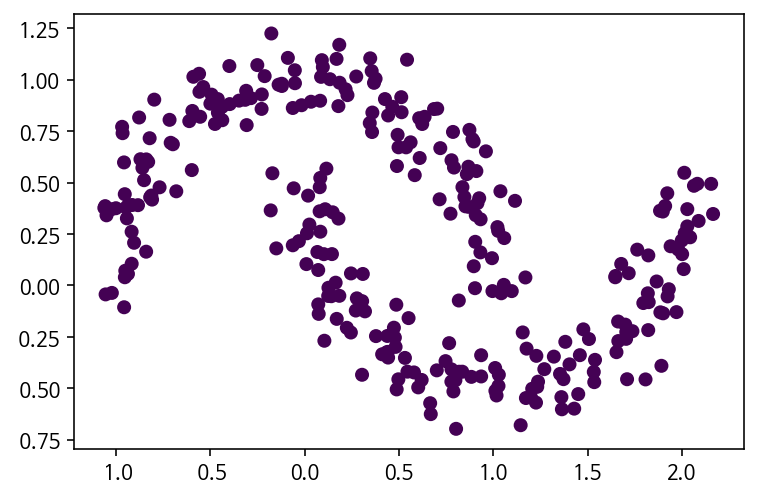

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


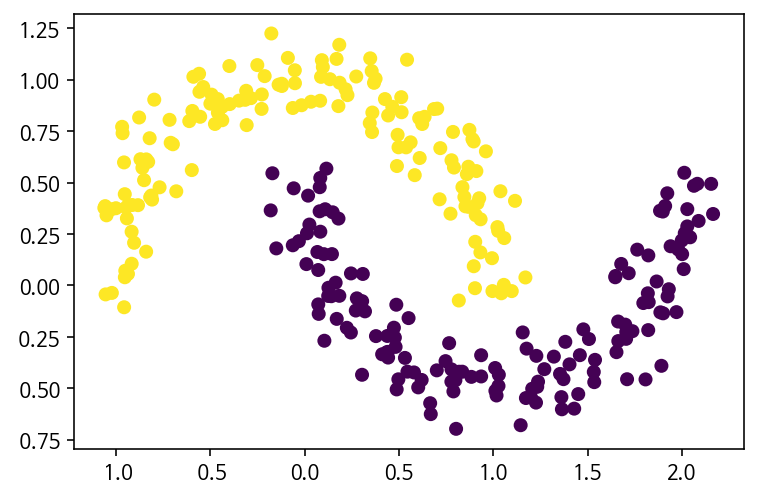

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=6, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


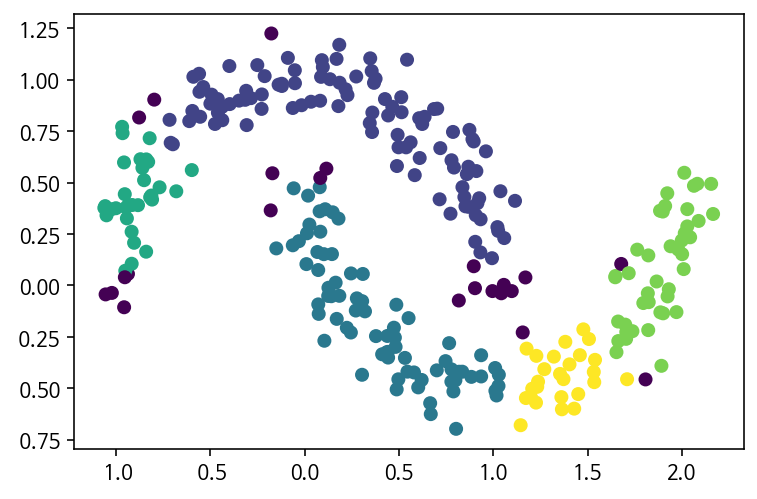

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=15, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

# more on clustering

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

X = [[0, 1], [1, 1]]
print(euclidean_distances(X, X))
print(euclidean_distances(X, [[0,0]]))
print(cosine_distances(X,X))       # defined as 1 - cos_similarity
print(manhattan_distances(X,[[0,0]]))

[[0. 1.]
 [1. 0.]]
[[1.        ]
 [1.41421356]]
[[0.         0.29289322]
 [0.29289322 0.        ]]
[[1.]
 [2.]]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


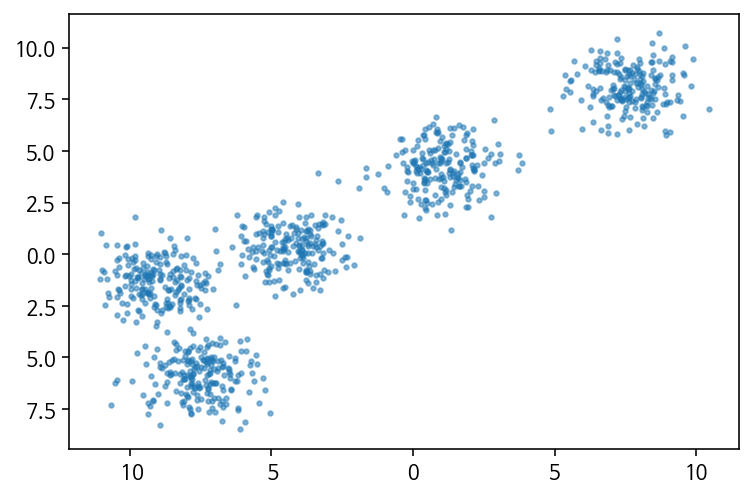

In [ ]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_features=2, n_samples=1000, centers=5, cluster_std=1, random_state=3)    
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

##### KMeans Algorithm
1. Initialize k centroids.
2. Assign each data to the nearest centroid, these step will create clusters.
3. Recalculate centroid - which is mean of all data belonging to same cluster.
4. Repeat steps 2 & 3, till there is no data to reassign a different centroid.

Animation to explain algo - http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

# 한글 폰트

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm

In [ ]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [ ]:
%cd /root/.cache/matplotlib

/root/.cache/matplotlib


In [ ]:
!ls -l

total 92
-rw-r--r-- 1 root root 46443 Jun 17 13:59 fontList.json
-rw-r--r-- 1 root root 37898 Jun 22 00:07 fontlist-v310.json
drwxr-xr-x 2 root root  4096 Jun 17 13:39 tex.cache


In [ ]:
#!cat fontList.json

In [ ]:
# 설치된 폰트 리스트를 찍어본다
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))

48


In [ ]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/n

- 나눔고딕 font install

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
# 한번 프린트 해보자
nanum_font

['/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',


In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.10
설정 폰트 글꼴: ['NanumBarunGothic'], 설정 폰트 사이즈: 10.0


In [ ]:
# path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [ ]:
# 우선 fm._rebuild() 를 해주고
fm._rebuild()